In [1]:
#import necessary modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [2]:
#import the sales and product table
df1 = pd.read_csv('sales.csv')
df2 = pd.read_csv('product.csv')

In [3]:
#view first table
df1.head(5)

,OrderDate,OrderNumber,ProductKey,SalespersonKey,Salesperson,Supervisor,Manager,Channel,Quantity,UnitPrice
0,1/12/2019,1492762,1420,265,Julio Lima,Diogo Carvalho,Gabriel Azevedo,Distributor,6,4.44
1,1/12/2019,1492762,1073,265,Julio Lima,Diogo Carvalho,Gabriel Azevedo,Distributor,6,8.83
2,1/12/2019,1492762,264,265,Julio Lima,Diogo Carvalho,Gabriel Azevedo,Distributor,10,0.96
3,1/13/2019,1492719,1154,265,Julio Lima,Diogo Carvalho,Gabriel Azevedo,Distributor,6,2.92
4,1/13/2019,1492719,1527,265,Julio Lima,Diogo Carvalho,Gabriel Azevedo,Distributor,6,2.81


In [4]:
#view 2nd table

df2

,ID,ProductName,ProductGroup,ProductCategory
0,108,Product 108,Ground Coffee,Food
1,111,Product 111,Vegetable,Food
2,114,Product 114,Spices,Food
3,118,Product 118,Spices,Food
4,120,Product 120,Spices,Food
...,...,...,...,...
793,2678,Product 2678,Spices,Food
794,2683,Product 2683,Wheat Flour,Food
795,2684,Product 2684,Wheat Flour,Food
796,2685,Product 2685,Wheat Flour,Food


In [5]:
#check datatype
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260096 entries, 0 to 260095
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   OrderDate       260096 non-null  object 
 1   OrderNumber     260096 non-null  int64  
 2   ProductKey      260096 non-null  int64  
 3   SalespersonKey  260096 non-null  int64  
 4   Salesperson     260096 non-null  object 
 5   Supervisor      260096 non-null  object 
 6   Manager         260096 non-null  object 
 7   Channel         260096 non-null  object 
 8   Quantity        260096 non-null  int64  
 9   UnitPrice       260096 non-null  float64
dtypes: float64(1), int64(4), object(5)
memory usage: 19.8+ MB


In [6]:
#correct the datatype of the orderDate to a Datetime datatype
df1["OrderDate"] = pd.to_datetime(df1["OrderDate"], errors="coerce")

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260096 entries, 0 to 260095
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   OrderDate       260096 non-null  datetime64[ns]
 1   OrderNumber     260096 non-null  int64         
 2   ProductKey      260096 non-null  int64         
 3   SalespersonKey  260096 non-null  int64         
 4   Salesperson     260096 non-null  object        
 5   Supervisor      260096 non-null  object        
 6   Manager         260096 non-null  object        
 7   Channel         260096 non-null  object        
 8   Quantity        260096 non-null  int64         
 9   UnitPrice       260096 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(4)
memory usage: 19.8+ MB


# To-do List

1. Every customer that buys 20 or more units gets a 2% discount
2. Total revenue
3. Total order
4. Total discount amount
5. Revenue and order per month
6. Revenue per salesperson
7. Order per sales person
8. Top 10 Product with highest Revenue
9. Revenue by channel
10. Revenue by product category
11. Order by product category

In [8]:
#1
# first get revenue before discount
df1['Initial_Revenue'] = df1.UnitPrice * df1.Quantity

# now identify those qualified for discount according to the condition given
df1['Discount'] = np.where(df1['Quantity'] >= 20, 0.02 , 0)

#discount amount
df1['Discount_Amount'] = df1.Initial_Revenue * df1['Discount']

#final revenue, which is the revenue after discount
df1['Final_Revenue'] = df1.Initial_Revenue - df1.Discount_Amount

In [9]:
df1.head(5)

,OrderDate,OrderNumber,ProductKey,SalespersonKey,Salesperson,Supervisor,Manager,Channel,Quantity,UnitPrice,Initial_Revenue,Discount,Discount_Amount,Final_Revenue
0,2019-01-12,1492762,1420,265,Julio Lima,Diogo Carvalho,Gabriel Azevedo,Distributor,6,4.44,26.64,0.0,0.0,26.64
1,2019-01-12,1492762,1073,265,Julio Lima,Diogo Carvalho,Gabriel Azevedo,Distributor,6,8.83,52.98,0.0,0.0,52.98
2,2019-01-12,1492762,264,265,Julio Lima,Diogo Carvalho,Gabriel Azevedo,Distributor,10,0.96,9.60,0.0,0.0,9.60
3,2019-01-13,1492719,1154,265,Julio Lima,Diogo Carvalho,Gabriel Azevedo,Distributor,6,2.92,17.52,0.0,0.0,17.52
4,2019-01-13,1492719,1527,265,Julio Lima,Diogo Carvalho,Gabriel Azevedo,Distributor,6,2.81,16.86,0.0,0.0,16.86


In [10]:
#2
#What's the total revenue?
Total_Revenue = df1['Final_Revenue'].sum()
print('Total Revenue is: $' + str(f"{Total_Revenue:,}"))

Total Revenue is: $17,697,493.9162


In [11]:
#3
#Total Order
#We need to do a distinct count of the ordernumber column

Total_Order = df1['OrderNumber'].nunique()
print('Total Order is: ' + str(f"{Total_Order:,}"))

Total Order is: 52,560


In [12]:
#4
#Total Discount Amount

Total_Discount_Amount = df1['Discount_Amount'].sum()
print('Total Discount Amount is: $' + str(f"{Total_Discount_Amount:,}"))

Total Discount Amount is: $211,738.57379999998


In [13]:
#5
#Revenue and Order per Month

#first we need a column for month
df1['month_num'] = df1['OrderDate'].dt.month

## month name
df1['month'] = df1['OrderDate'].dt.strftime('%B')

In [14]:
#Revenue and Order per Month
month_pivot = df1.pivot_table(values=['Final_Revenue','OrderNumber'], 
                             index=['month_num','month'], 
                             aggfunc={'Final_Revenue':'sum', 'OrderNumber':'nunique'})
month_pivot = month_pivot.reset_index()
pd.set_option('display.float_format', '{:,.2f}'.format)
month_pivot

,month_num,month,Final_Revenue,OrderNumber
0,1,January,"1,347,211.21",3894
1,2,February,"956,282.07",2792
2,3,March,"1,073,869.75",2719
3,4,April,"1,142,935.58",2906
4,5,May,"1,344,217.24",3713
5,6,June,"1,322,778.09",4025
6,7,July,"1,545,031.06",4688
7,8,August,"1,683,398.44",5141
8,9,September,"1,869,516.74",5608
9,10,October,"1,934,676.89",6105


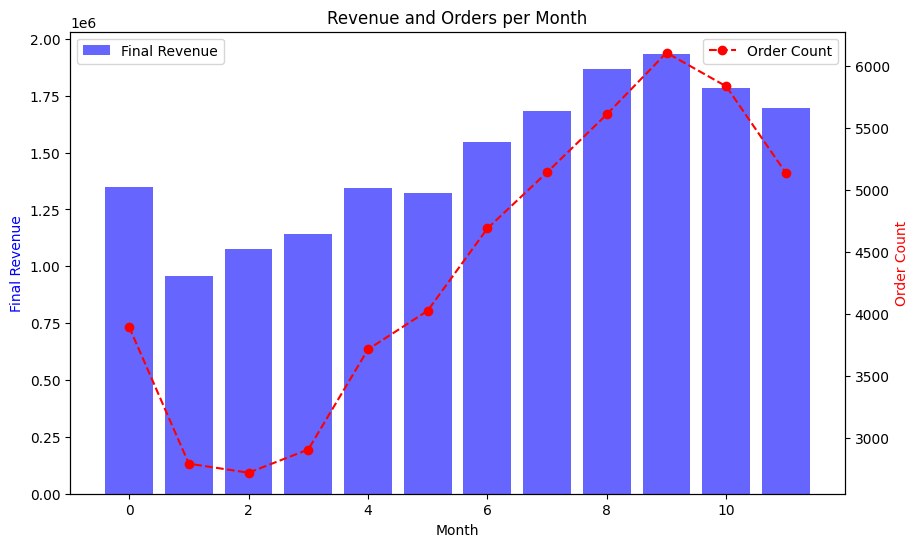

In [15]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Revenue Bar Chart
ax1.bar(month_pivot.index, month_pivot['Final_Revenue'], color='blue', alpha=0.6, label='Final Revenue')
ax1.set_xlabel('Month')
ax1.set_ylabel('Final Revenue', color='blue')

# Create second y-axis for Orders
ax2 = ax1.twinx()
ax2.plot(month_pivot.index, month_pivot['OrderNumber'], color='red', marker='o', linestyle='dashed', label='Order Count')
ax2.set_ylabel('Order Count', color='red')

# Title & Legends
plt.title('Revenue and Orders per Month')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()


In [16]:
#6 & #7
#Revenue and Order by Salesperson

salesperson_pivot = df1.pivot_table(values=['Final_Revenue','OrderNumber'], 
                             index='Salesperson', 
                             aggfunc={'Final_Revenue':'sum', 'OrderNumber':'nunique'})
salesperson_pivot = salesperson_pivot.sort_values(by='Final_Revenue', ascending=False)
pd.set_option('display.float_format', '{:,.2f}'.format)
salesperson_pivot

,Final_Revenue,OrderNumber
Salesperson,,
Carla Ferreira,"4,643,264.16",9570
Julio Lima,"3,263,967.66",10022
Gustavo Gomes,"2,420,293.95",6790
Felipe Goncalves,"1,656,050.66",6285
Leonardo Cardoso,"1,585,877.66",5901
Isabella Sousa,"859,933.22",1772
Kaua Araujo,"820,347.81",2429
Mateus Costa,"774,987.71",2767
Gustavo Barros,"655,922.62",2497


In [17]:
#8
#Revenue By channel
channel_pivot = df1.pivot_table(values=['Final_Revenue'], 
                             index='Channel', 
                             aggfunc='sum')
channel_pivot = channel_pivot.sort_values(by='Final_Revenue', ascending=False)
pd.set_option('display.float_format', '{:,.2f}'.format)

channel_pivot

,Final_Revenue
Channel,
Retail,"8,591,376.12"
Distributor,"6,030,050.57"
Online,"3,076,067.22"


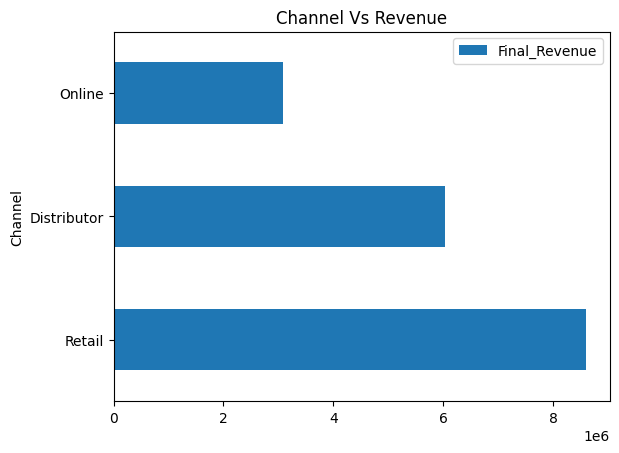

In [18]:
channel_pivot.plot(kind='barh')
plt.title('Channel Vs Revenue')
plt.show()

In [19]:
#9
#Revenue by product category
#the product data is in a different, we have to merge both sales and product table

merged_df = pd.merge(df1, df2, left_on='ProductKey', right_on='ID', how='left')

merged_df.head(10)

,OrderDate,OrderNumber,ProductKey,SalespersonKey,Salesperson,Supervisor,Manager,Channel,Quantity,UnitPrice,Initial_Revenue,Discount,Discount_Amount,Final_Revenue,month_num,month,ID,ProductName,ProductGroup,ProductCategory
0,2019-01-12,1492762,1420,265,Julio Lima,Diogo Carvalho,Gabriel Azevedo,Distributor,6,4.44,26.64,0.00,0.00,26.64,1,January,1420,Product 1420,Coffee in Capsules,Food
1,2019-01-12,1492762,1073,265,Julio Lima,Diogo Carvalho,Gabriel Azevedo,Distributor,6,8.83,52.98,0.00,0.00,52.98,1,January,1073,Product 1073,Spices,Food
2,2019-01-12,1492762,264,265,Julio Lima,Diogo Carvalho,Gabriel Azevedo,Distributor,10,0.96,9.60,0.00,0.00,9.60,1,January,264,Product 264,Yeasts,Food
3,2019-01-13,1492719,1154,265,Julio Lima,Diogo Carvalho,Gabriel Azevedo,Distributor,6,2.92,17.52,0.00,0.00,17.52,1,January,1154,Product 1154,Popcorn,Food
4,2019-01-13,1492719,1527,265,Julio Lima,Diogo Carvalho,Gabriel Azevedo,Distributor,6,2.81,16.86,0.00,0.00,16.86,1,January,1527,Product 1527,Popcorn,Food
5,2019-01-13,1492719,1862,265,Julio Lima,Diogo Carvalho,Gabriel Azevedo,Distributor,6,2.81,16.86,0.00,0.00,16.86,1,January,1862,Product 1862,Popcorn,Food
6,2019-01-13,1492719,438,265,Julio Lima,Diogo Carvalho,Gabriel Azevedo,Distributor,6,7.85,47.10,0.00,0.00,47.10,1,January,438,Product 438,Oil,Food
7,2019-01-13,1492719,1468,265,Julio Lima,Diogo Carvalho,Gabriel Azevedo,Distributor,8,5.69,45.52,0.00,0.00,45.52,1,January,1468,Product 1468,Spices,Food
8,2019-01-13,1492719,1534,265,Julio Lima,Diogo Carvalho,Gabriel Azevedo,Distributor,24,2.56,61.44,0.02,1.23,60.21,1,January,1534,Product 1534,Wheat Flour,Food
9,2019-01-13,1492719,203,265,Julio Lima,Diogo Carvalho,Gabriel Azevedo,Distributor,24,1.73,41.52,0.02,0.83,40.69,1,January,203,Product 203,Wheat Flour,Food


In [20]:
prodcategory_vs_finalRevenue_and_order = merged_df.pivot_table(values=['Final_Revenue','OrderNumber'], 
                             index='ProductCategory', 
                             aggfunc={'Final_Revenue':sum, 'OrderNumber':'nunique'})
prodcategory_vs_finalRevenue_and_order= prodcategory_vs_finalRevenue_and_order.sort_values(by='Final_Revenue', ascending=False)
pd.set_option('display.float_format', '{:,.2f}'.format)
prodcategory_vs_finalRevenue_and_order

C:\Users\DELL\AppData\Local\Temp\ipykernel_1772\2606302185.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  prodcategory_vs_finalRevenue_and_order = merged_df.pivot_table(values=['Final_Revenue','OrderNumber'],


,Final_Revenue,OrderNumber
ProductCategory,,
Food,"16,157,089.73",47414
Drink,"1,540,404.18",5146


In [21]:
#10
#Top 10 Product with highest revenue

prod_pivot = merged_df.pivot_table(values='Final_Revenue', 
                             index='ProductName', 
                             aggfunc=sum)
prod_pivot = prod_pivot.sort_values(by='Final_Revenue', ascending=False).head(10)
pd.set_option('display.float_format', '{:,.2f}'.format)
prod_pivot

C:\Users\DELL\AppData\Local\Temp\ipykernel_1772\1911624976.py:4: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  prod_pivot = merged_df.pivot_table(values='Final_Revenue',


,Final_Revenue
ProductName,
Product 1968,"732,257.23"
Product 2026,"543,337.88"
Product 662,"522,893.31"
Product 2445,"504,443.79"
Product 2233,"386,048.55"
Product 235,"318,605.45"
Product 845,"290,664.17"
Product 527,"273,934.92"
Product 1948,"230,922.37"
